<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/Ash_M3_MP2_NB_HeartDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 02 : HeartDisease_Classification

### Dataset Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
#@title Download dataset
!gdown "1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7"

Downloading...
From: https://drive.google.com/uc?id=1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 75.3MB/s]


### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
# Print the top 5 data points
# YOUR CODE HERE
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

### Data Exploration (2 Marks)

<Axes: xlabel='target', ylabel='count'>

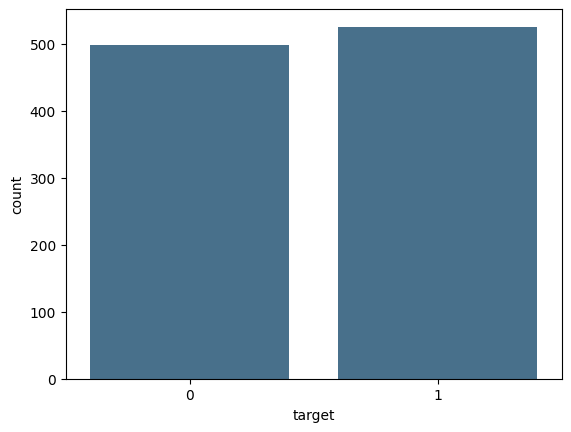

In [ ]:
# Create a countplot using Seaborn's countplot function to visualize the distribution of the 'target' variable in the DataFrame
def formater_function(x):
  print(x)
  return x
sns.countplot(df, x="target", saturation=0.45)

Analyze and report the percentage of patients with and without heart disease based on a given dataset. Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.

<Axes: xlabel='target', ylabel='percent'>

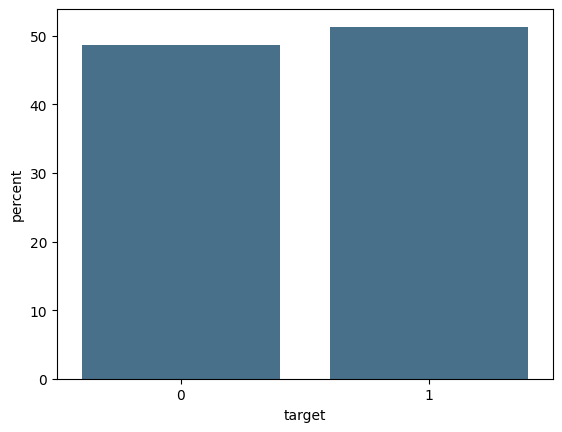

In [ ]:
# Analyze and report the percentage of patients with and without heart disease based on a given dataset.
# Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.
# YOUR CODE HERE
sns.countplot(df, x="target", saturation=0.45, stat='percent')


Count the percentage of Male and Female patients

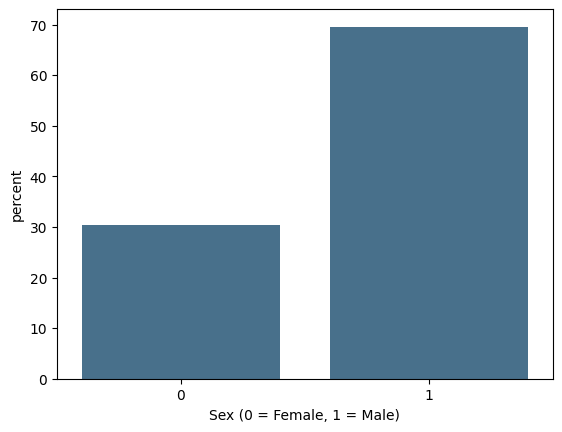

In [ ]:
# YOUR CODE HERE : Count the percentage of Male and Female patients
sns.countplot(df, x="sex", saturation=0.45, stat='percent')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()

In [ ]:
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317  2.539078  
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722  2.119772

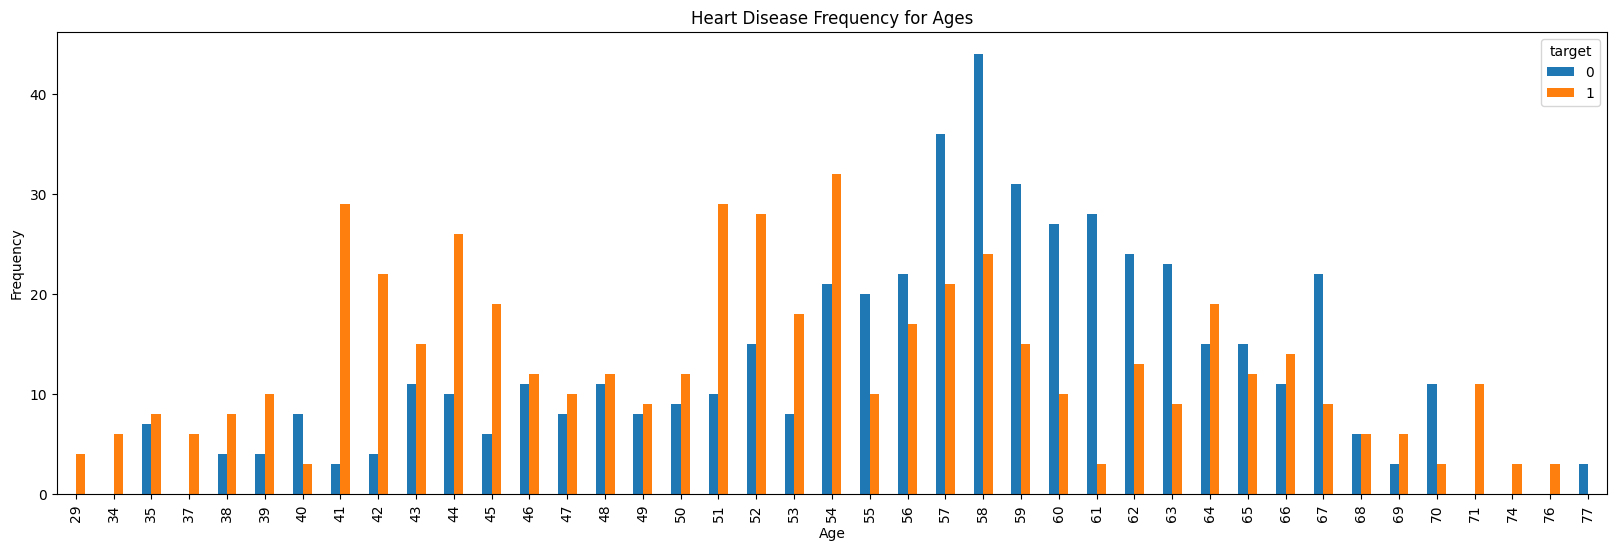

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
df['age'].describe()
# df['Age_range'] = pd.qcut(df['age'],8)

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

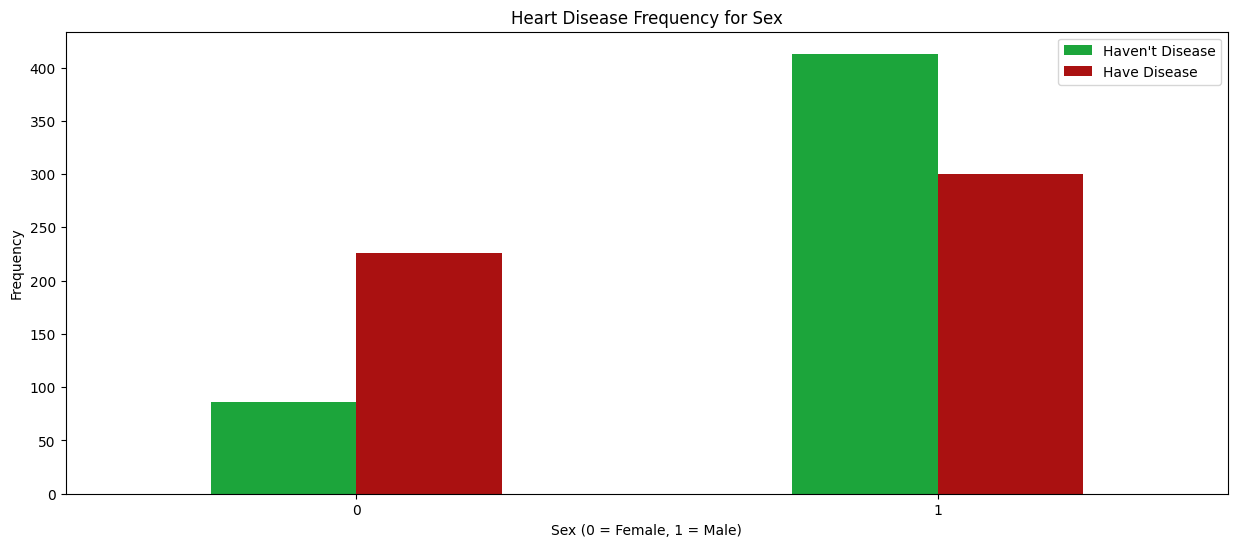

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

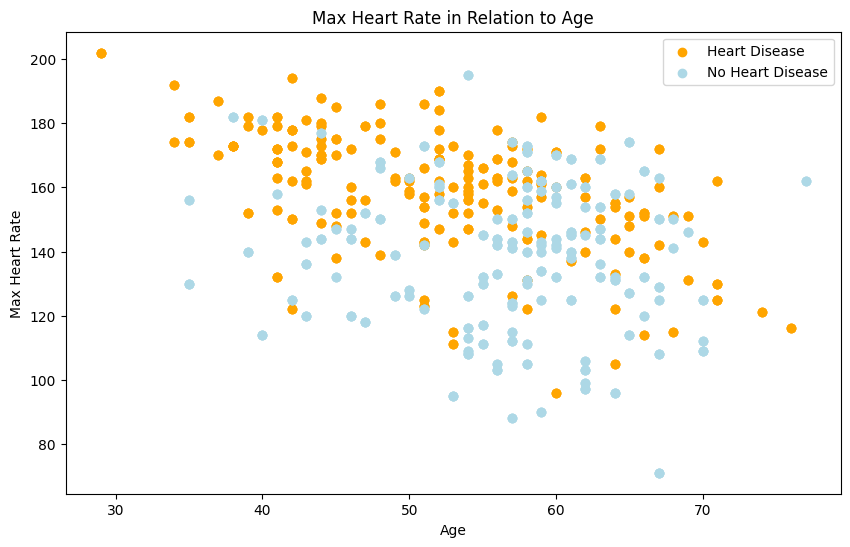

In [ ]:
# YOUR CODE HERE : Create a scatter plot to visualize the relationship between a patient's age and their maximum heart rate based on a given dataset.
fig,ax = plt.subplots(figsize=(10, 6))

# Scatter with positive examples
positive = ax.scatter(df.age[df.target==1],
                          df.thalach[df.target == 1],
                          color="orange", label="Heart Disease")

# Scatter with negative examples
negative = ax.scatter(df.age[df.target==0],
                          df.thalach[df.target == 0],
                          color="lightblue", label="No Heart Disease")

# Get mean line
mean = df["thalach"].mean()
mean_line = ax.plot()

# Customize the plot
plt.title("Max Heart Rate in Relation to Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

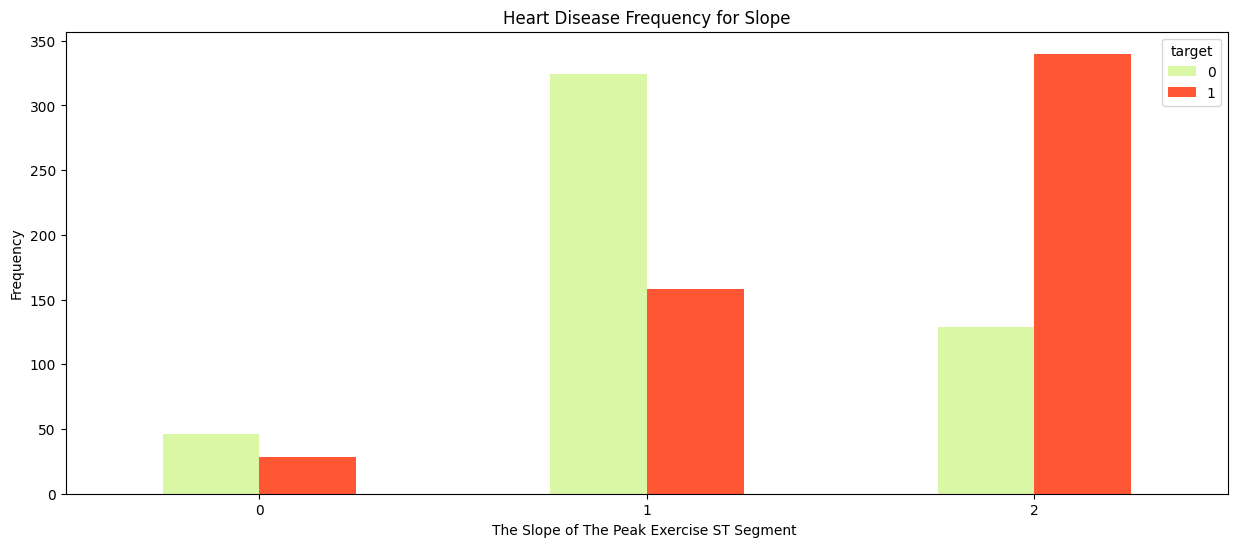

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

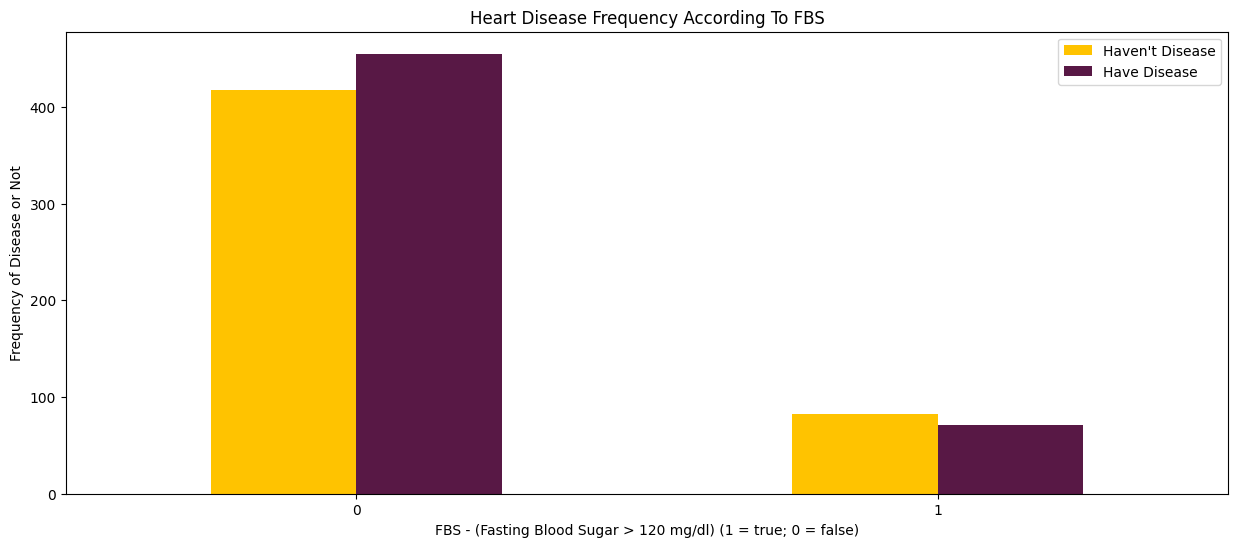

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()


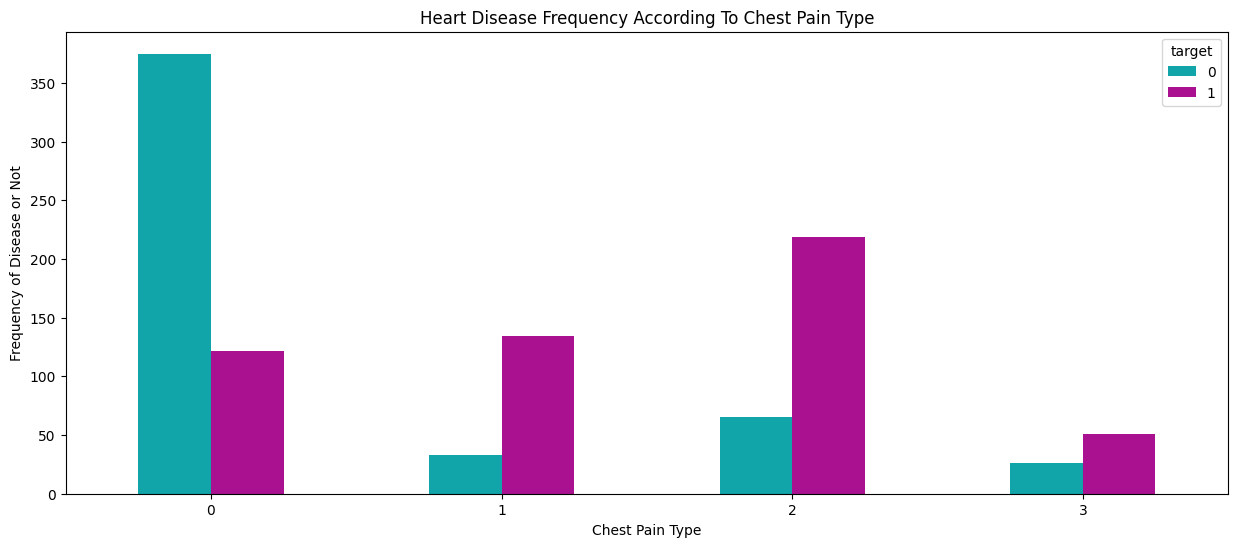

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
a_int = a.astype(int)
b = pd.get_dummies(df['thal'], prefix = "thal")
b_int = b.astype(int)
c = pd.get_dummies(df['slope'], prefix = "slope")
c_int = c.astype(int)
d = pd.get_dummies(df['restecg'], prefix="restecg")
d_int = d.astype(int)
e = pd.get_dummies(df['ca'], prefix="ca")
e_int = d.astype(int)

In [ ]:
df_copy = df.copy()
df_copy = pd.concat([df_copy, a_int, b_int, c_int, d_int, c_int], axis =1)
print(df_copy.head())
df_copy = df_copy.drop(columns = ['cp', 'thal', 'slope', 'restecg', 'ca'])
print(df_copy.head())

y_copy = df_copy['target'].values
df_copy = df_copy.drop('target', axis = 1)
X_copy = df_copy.values


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   52    1   0       125   212    0        1      168      0      1.0  ...   
1   53    1   0       140   203    1        0      155      1      3.1  ...   
2   70    1   0       145   174    0        1      125      1      2.6  ...   
3   61    1   0       148   203    0        1      161      0      0.0  ...   
4   62    0   0       138   294    1        1      106      0      1.9  ...   

   thal_3  slope_0  slope_1  slope_2  restecg_0  restecg_1  restecg_2  \
0       1        0        0        1          0          1          0   
1       1        1        0        0          1          0          0   
2       1        1        0        0          0          1          0   
3       1        0        0        1          0          1          0   
4       0        0        1        0          0          1          0   

   slope_0  slope_1  slope_2  
0        0        0        1  
1        1        0     

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   52    1   0       125   212    0        1      168      0      1.0  ...   
1   53    1   0       140   203    1        0      155      1      3.1  ...   
2   70    1   0       145   174    0        1      125      1      2.6  ...   
3   61    1   0       148   203    0        1      161      0      0.0  ...   
4   62    0   0       138   294    1        1      106      0      1.9  ...   

    cp_1   cp_2   cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  \
0  False  False  False   False   False   False    True    False    False   
1  False  False  False   False   False   False    True     True    False   
2  False  False  False   False   False   False    True     True    False   
3  False  False  False   False   False   False    True    False    False   
4  False  False  False   False   False    True   False    False     True   

   slope_2  
0     True  
1    False  
2    False  
3     True  
4    False  

[5 rows x 25 columns]

In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()


[0 1 2]


In [ ]:
print(np.unique(df['ca']))

[0 1 2 3 4]


### Creating Model


In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data ( 1 Mark)

In [ ]:
from sklearn.preprocessing import Normalizer,MinMaxScaler

In [ ]:
norm = Normalizer()
X_normalised = norm.fit_transform(X_copy)

min_max = MinMaxScaler()
X_min_max_scaled = min_max.fit_transform(X_copy)

print(X_normalised[0:5])
# YOUR CODE HERE: Normalize the data

[[0.17190294 0.00330583 0.41322822 0.70083506 0.         0.55537873
  0.         0.00330583 0.00330583 0.         0.         0.
  0.         0.         0.         0.00330583 0.         0.
  0.00330583 0.         0.00330583 0.         0.         0.
  0.00330583]
 [0.17900849 0.00337752 0.47285261 0.68563629 0.00337752 0.52351539
  0.00337752 0.01047031 0.00337752 0.         0.         0.
  0.         0.         0.         0.00337752 0.00337752 0.
  0.         0.00337752 0.         0.         0.00337752 0.
  0.        ]
 [0.26116538 0.00373093 0.54098543 0.64918251 0.         0.46636675
  0.00373093 0.00970043 0.00373093 0.         0.         0.
  0.         0.         0.         0.00373093 0.00373093 0.
  0.         0.         0.00373093 0.         0.00373093 0.
  0.        ]
 [0.2002844  0.00328335 0.48593592 0.66652022 0.         0.52861948
  0.         0.         0.00328335 0.         0.         0.
  0.         0.         0.         0.00328335 0.         0.
  0.00328335 0.         0.

In [ ]:
df_copy.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  cp_0  cp_1  ...  \
0   52    1       125   212    0      168      0      1.0     1     0  ...   
1   53    1       140   203    1      155      1      3.1     1     0  ...   
2   70    1       145   174    0      125      1      2.6     1     0  ...   
3   61    1       148   203    0      161      0      0.0     1     0  ...   
4   62    0       138   294    1      106      0      1.9     1     0  ...   

   thal_3  slope_0  slope_1  slope_2  restecg_0  restecg_1  restecg_2  \
0       1        0        0        1          0          1          0   
1       1        1        0        0          1          0          0   
2       1        1        0        0          0          1          0   
3       1        0        0        1          0          1          0   
4       0        0        1        0          0          1          0   

   slope_0  slope_1  slope_2  
0        0        0        1  
1        1        0        0  
2        1        0        0  
3        0        0        1  
4        0        1        0  

[5 rows x 25 columns]

In [ ]:
# print(X_min_max_scaled[0:5])
print(np.unique(X_min_max_scaled[:,10]))


[0. 1.]


In [ ]:
# YOUR CODE HERE : Train test split
x_train, x_test, y_train, y_test = train_test_split(X_min_max_scaled, y_copy, train_size=0.8, random_state=42)

### Logistic Regression (1 Mark)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [ ]:
# YOUr CODE HERE : Perform binary classification using Logistic Regression and calculate the accuracy of the model on a test dataset.
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR_score = LR.score(x_test, y_test)
print('Accuracy: ', LR_score)

Accuracy:  0.7853658536585366


In [ ]:
x_train.shape, x_test.shape


((512, 25), (513, 25))

In [ ]:
LR_cv = LogisticRegressionCV(
    cv = 6,
    solver = 'newton-cholesky',
    n_jobs=-1
)
LR_cv.fit(x_train,y_train)
score = LR_cv.score(x_test,y_test)
print("Accuracy: ",score)
print(LR_cv.scores_)

Accuracy:  0.7902439024390244
{1: array([[0.51094891, 0.76642336, 0.81021898, 0.83211679, 0.84671533,
        0.83941606, 0.82481752, 0.81751825, 0.81751825, 0.81751825],
       [0.51824818, 0.80291971, 0.80291971, 0.83211679, 0.84671533,
        0.83211679, 0.83941606, 0.83941606, 0.83941606, 0.83941606],
       [0.51824818, 0.78832117, 0.83211679, 0.81751825, 0.84671533,
        0.84671533, 0.8540146 , 0.8540146 , 0.8540146 , 0.8540146 ],
       [0.51824818, 0.80291971, 0.80291971, 0.83211679, 0.83941606,
        0.82481752, 0.82481752, 0.81021898, 0.81021898, 0.81021898],
       [0.51470588, 0.78676471, 0.83823529, 0.84558824, 0.83088235,
        0.86029412, 0.86764706, 0.86764706, 0.86764706, 0.86764706],
       [0.51470588, 0.78676471, 0.80147059, 0.83823529, 0.82352941,
        0.81617647, 0.81617647, 0.81617647, 0.81617647, 0.81617647]])}


### K-Nearest Neighbour (KNN) Classification ( 1 Mark)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# YOUR CODE HERE : Perform binary classification using the k-Nearest Neighbors (KNN) algorithm and calculate the accuracy of the model on a test dataset.
def classify_by_KNN(n=9):
  knn = KNeighborsClassifier(
      n_neighbors= n,
      n_jobs = -1
  )
  return knn

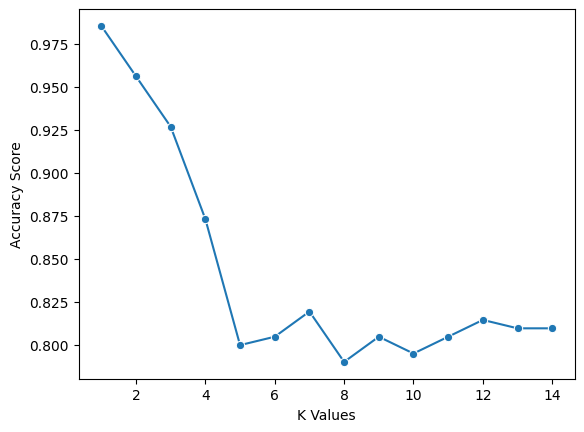

accuracy:  0.9853658536585366


In [ ]:
# YOUR CODE HERE :  Find the Best k-value
def find_best_k_value(k_list):
  scores =[]
  for n in k_list:
    knn = classify_by_KNN(n)
    knn.fit(x_train,y_train)
    score = knn.score(x_test,y_test)
    scores.append(score)
  # plot a line gragh
  sns.lineplot(x = k_list, y = scores, marker = 'o')
  plt.xlabel("K Values")
  plt.ylabel("Accuracy Score")
  plt.show()
  # scores = np.array(scores)
  # return k_list[np.argmax(scores)]

find_best_k_value(np.arange(1,15))
# print("best n value is: ", optimum_n)
knn = classify_by_KNN(1)
knn.fit(x_train,y_train)
knn_score = knn.score(x_test,y_test)
print("accuracy: ", knn_score)

### Support Vector Machine (SVM) Algorithm ( 1 Mark)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Support Vector Machine (SVM) algorithm and calculate the accuracy of the SVM model on a test dataset.
parameters = {'kernel':['linear','rbf'], 'C':[1,10, 20, 30, 40, 50, 100, 200, 500]}
svc = SVC(class_weight='balanced', probability=True)
clf = GridSearchCV(svc, parameters, scoring= 'accuracy')
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100, 200, 500],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print("Parameters: ",clf.cv_results_['params'])
print("Mean test score: ",clf.cv_results_['mean_test_score'])
print("Standard test error: ",clf.cv_results_['std_test_score'])
print("CV Ranking",clf.cv_results_['rank_test_score'])


Parameters:  [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 20, 'kernel': 'linear'}, {'C': 20, 'kernel': 'rbf'}, {'C': 30, 'kernel': 'linear'}, {'C': 30, 'kernel': 'rbf'}, {'C': 40, 'kernel': 'linear'}, {'C': 40, 'kernel': 'rbf'}, {'C': 50, 'kernel': 'linear'}, {'C': 50, 'kernel': 'rbf'}, {'C': 100, 'kernel': 'linear'}, {'C': 100, 'kernel': 'rbf'}, {'C': 200, 'kernel': 'linear'}, {'C': 200, 'kernel': 'rbf'}, {'C': 500, 'kernel': 'linear'}, {'C': 500, 'kernel': 'rbf'}]
Mean test score:  [0.83292683 0.85365854 0.8402439  0.92195122 0.83902439 0.9304878
 0.83902439 0.93658537 0.83780488 0.93780488 0.83536585 0.94756098
 0.83536585 0.96219512 0.83536585 0.96463415 0.83536585 0.97073171]
Standard test error:  [0.01833329 0.01849482 0.01302083 0.01825199 0.01063146 0.01313455
 0.01063146 0.01571232 0.00912599 0.0097561  0.01335909 0.00990736
 0.01335909 0.01463415 0.01335909 0.01513375 0.01335909 0.01302083]
CV Ranki

In [ ]:
best_clf = clf.best_estimator_
clf.best_params_

{'C': 500, 'kernel': 'rbf'}

In [ ]:
svc_score = best_clf.score(x_test, y_test)
print("accuracy", svc_score)
print("parameters: ", best_clf.get_params())

accuracy 0.9853658536585366
parameters:  {'C': 500, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
from sklearn.metrics import classification_report
svc_pred = best_clf.predict(x_test)
svc_report = classification_report(y_test,svc_pred)
print(svc_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Naive Bayes Algorithm ( 1 Mark)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Naive Bayes algorithm and calculate the accuracy of the model on a test dataset.
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test, y_test)
print('accuracy: ', nb_score)



accuracy:  0.7170731707317073


### Decision Tree ( 1 Mark)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# YOUR CODe HERE : Perform binary classification using the Decision Tree algorithm and calculate the accuracy of the model on a test dataset.
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=10)
decision_tree.fit(x_train, y_train)
dt_score = decision_tree.score(x_test, y_test)
print("accuracy: ", dt_score)
dt_predict = decision_tree.predict(x_test)
dt_report = classification_report(y_test,dt_predict)
print(dt_report)

accuracy:  0.9707317073170731
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       1.00      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
decision_tree.max_features_

25

In [ ]:
fig = plt.figure(figsize=(200,100))
ax = tree.plot_tree(decision_tree,class_names=["No heart disease","have heart disease"], feature_names = df_copy.columns ,filled=True)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0)
path = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

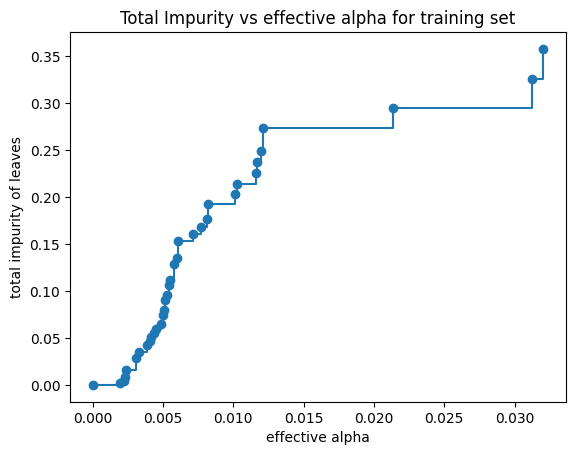

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

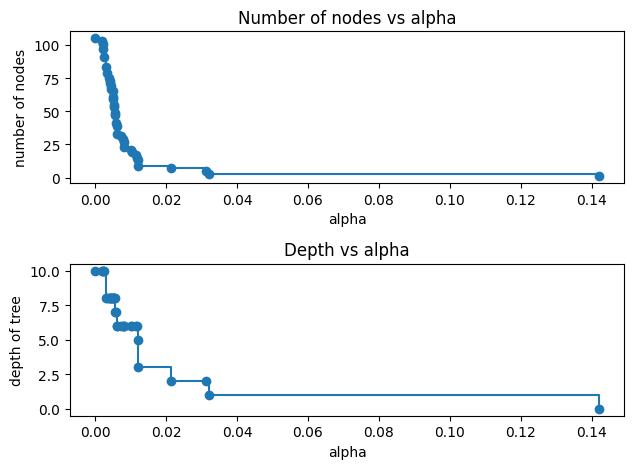

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

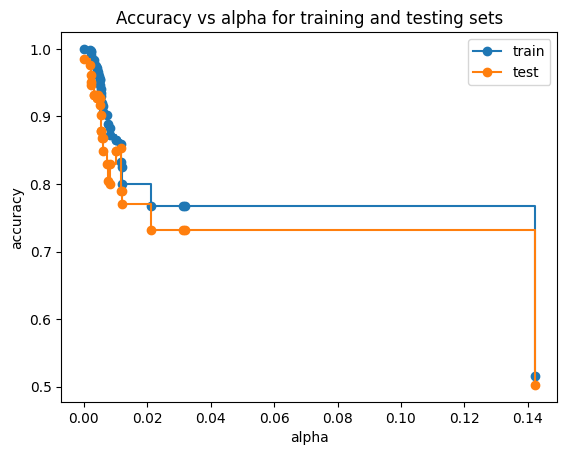

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Random Forest Classification ( 1 Mark)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Random Forest algorithm and calculate the accuracy of the model on a test dataset.
rfc = RandomForestClassifier(n_estimators=10, max_depth=10)
rfc.fit(x_train, y_train)
rfc_score = rfc.score(x_test,y_test)
print("accuracy: ", rfc_score)
rfc_pred = rfc.predict(x_test)
rfc_report = classification_report(y_test, rfc_pred)
print(rfc_report)

accuracy:  0.975609756097561
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.97      0.98      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
parameters = {'n_estimators':[3,5,8,10,12,15,20], 'max_depth':[10,12,15,20]}
rfc_hp = RandomForestClassifier()
hp_clf = GridSearchCV(rfc_hp, parameters, scoring= 'accuracy')
hp_clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 15, 20],
                         'n_estimators': [3, 5, 8, 10, 12, 15, 20]},
             scoring='accuracy')

In [ ]:
print("Parameters: ",hp_clf.cv_results_['params'])
print("Mean test score: ",hp_clf.cv_results_['mean_test_score'])
print("Standard test error: ",hp_clf.cv_results_['std_test_score'])
print("CV Ranking",hp_clf.cv_results_['rank_test_score'])

Parameters:  [{'max_depth': 10, 'n_estimators': 3}, {'max_depth': 10, 'n_estimators': 5}, {'max_depth': 10, 'n_estimators': 8}, {'max_depth': 10, 'n_estimators': 10}, {'max_depth': 10, 'n_estimators': 12}, {'max_depth': 10, 'n_estimators': 15}, {'max_depth': 10, 'n_estimators': 20}, {'max_depth': 12, 'n_estimators': 3}, {'max_depth': 12, 'n_estimators': 5}, {'max_depth': 12, 'n_estimators': 8}, {'max_depth': 12, 'n_estimators': 10}, {'max_depth': 12, 'n_estimators': 12}, {'max_depth': 12, 'n_estimators': 15}, {'max_depth': 12, 'n_estimators': 20}, {'max_depth': 15, 'n_estimators': 3}, {'max_depth': 15, 'n_estimators': 5}, {'max_depth': 15, 'n_estimators': 8}, {'max_depth': 15, 'n_estimators': 10}, {'max_depth': 15, 'n_estimators': 12}, {'max_depth': 15, 'n_estimators': 15}, {'max_depth': 15, 'n_estimators': 20}, {'max_depth': 20, 'n_estimators': 3}, {'max_depth': 20, 'n_estimators': 5}, {'max_depth': 20, 'n_estimators': 8}, {'max_depth': 20, 'n_estimators': 10}, {'max_depth': 20, 'n_es

In [ ]:
print("best parameters: ", hp_clf.best_params_)
print("best score: ", hp_clf.best_score_)
best_rfc_clf = hp_clf.best_estimator_

best parameters:  {'max_depth': 15, 'n_estimators': 12}
best score:  0.9817073170731707


In [ ]:
best_rfc_score = best_rfc_clf.score(x_test,y_test)
print("accuracy: ", best_rfc_score)
best_rfc_pred = best_rfc_clf.predict(x_test)
best_rfc_report = classification_report(y_test, best_rfc_pred)
print(best_rfc_report)

accuracy:  0.9902439024390244
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.98      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Comparing Models

In [ ]:
classifiers= ['Logistic Regression','K-Nearest Neighbour','Support Vector Machine',
              'Naive Bayes', 'Decision Tree', 'Random Forest']
models = [LR, knn, best_clf, nb, decision_tree, best_rfc_clf]
model_scores = [LR_score, knn_score, svc_score, nb_score, dt_score, best_rfc_score]

Text(0.5, 1.0, 'accuracy of different models')

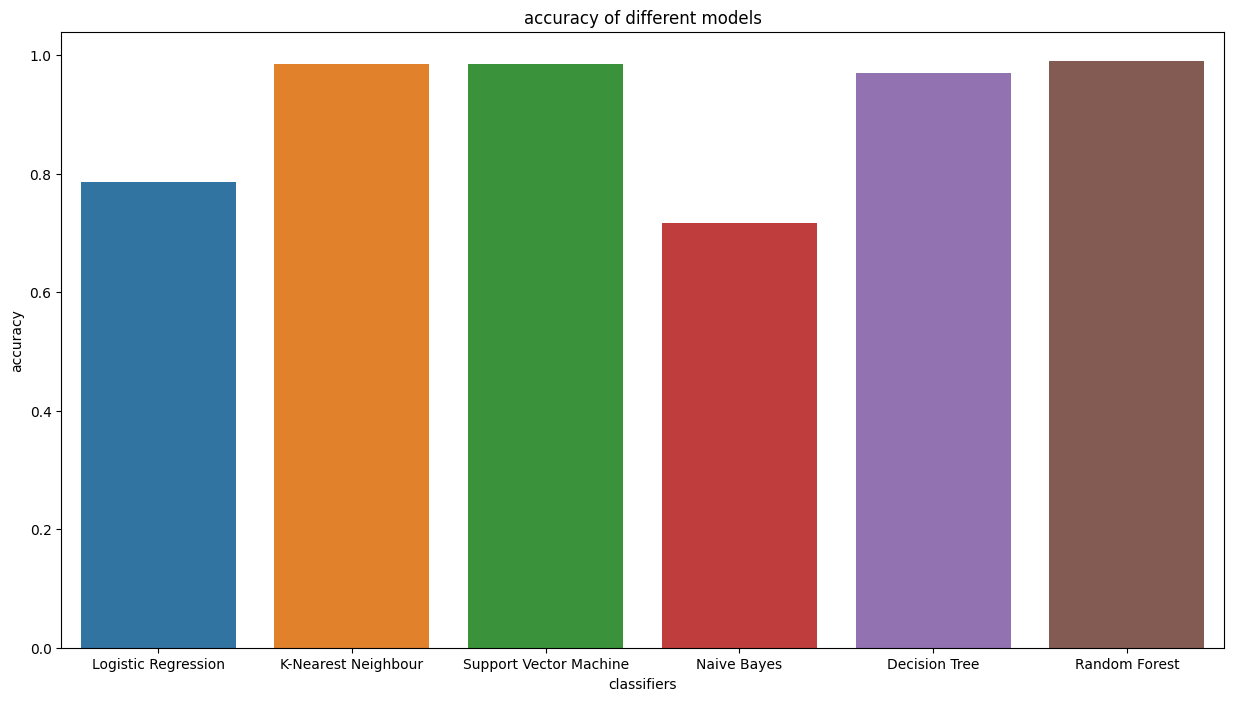

In [ ]:
 # Your Code Here : Visualize and compare the accuracy of different machine learning algorithms using a bar chart.

fig = plt.figure(figsize=(15,8))
sns.barplot(
     x= classifiers,
     y= model_scores,
     hue= classifiers,
)
plt.xlabel('classifiers')
plt.ylabel('accuracy')
plt.title('accuracy of different models')

### Confusion Matrix ( 1 Mark)

Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables.

In [ ]:
# YOUR CODE HERE : Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


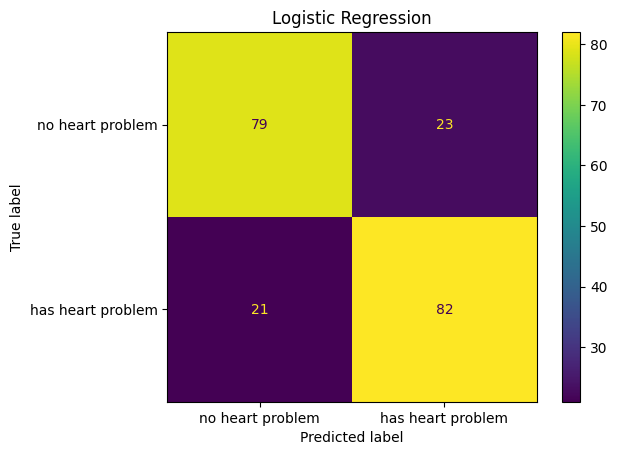

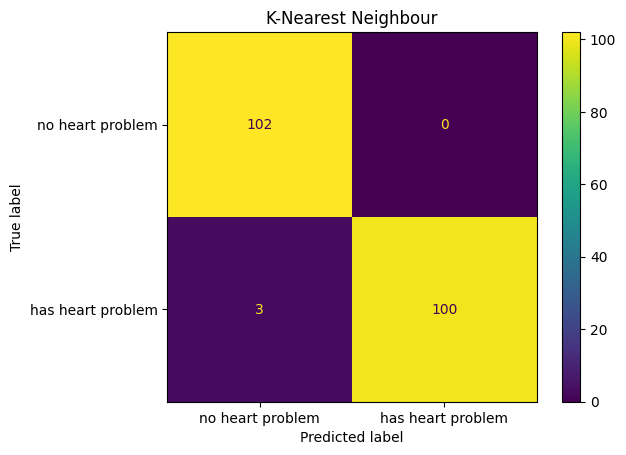

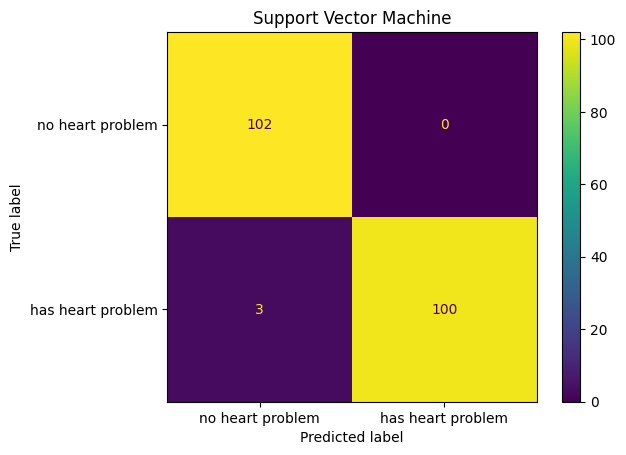

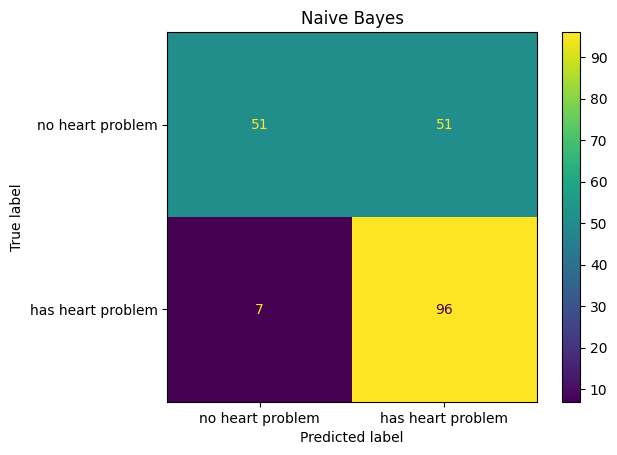

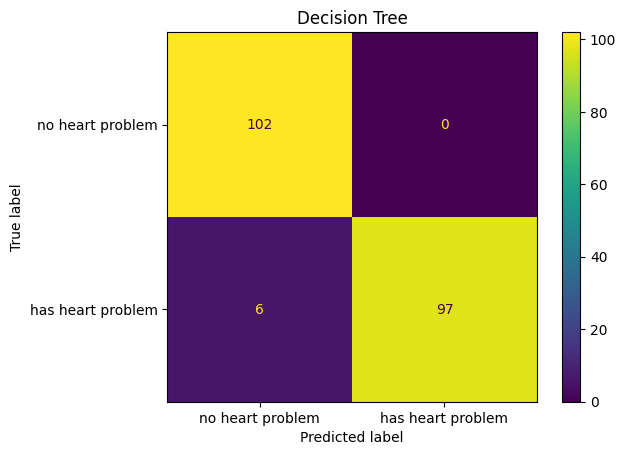

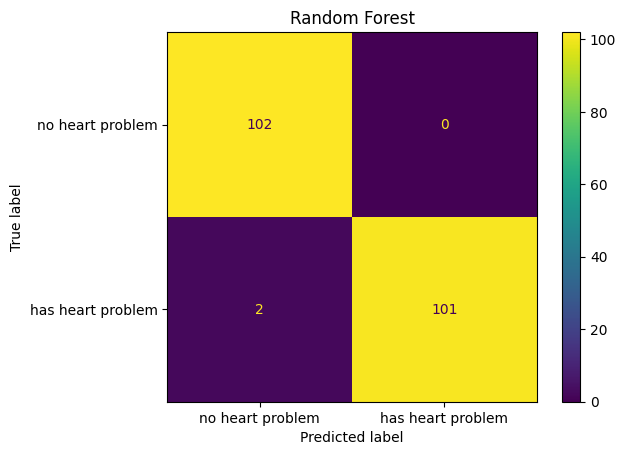

In [ ]:
# fig, axes = plt.subplots(3,2, figsize=(20,24))
for clf_name, clf in zip(classifiers, models):
  # cm = confusion_matrix(actual,pred)
  y_pred = clf.predict(x_test)
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ['no heart problem', "has heart problem"])
  plt.title(clf_name)
  plt.show()
  # cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Negative', "Positive"])
  # cm_display.plot()

# plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
def generate_roc_curve(pred_prob, y_test, label='model'):
  # roc curve for models
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

  plt.style.use('seaborn')

  # plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=label)

  plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

  area = auc(fpr1, tpr1)
  # title
  plt.title(f'ROC curve :{ area }')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state= 42)

K-Nearest Neighbour


<ipython-input-51-7b637d551466>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


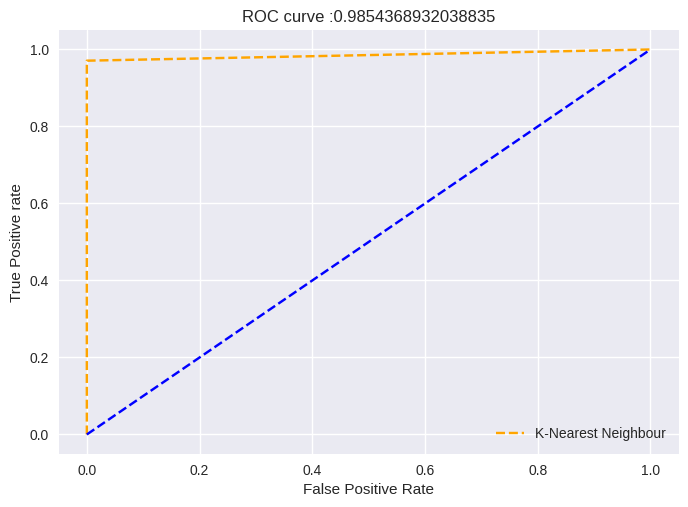

Model: K-Nearest Neighbour has cross validation mean: 0.9890243902439024
Model: K-Nearest Neighbour has cross validation standard deviation: 0.014886043433821603
Support Vector Machine


<ipython-input-51-7b637d551466>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


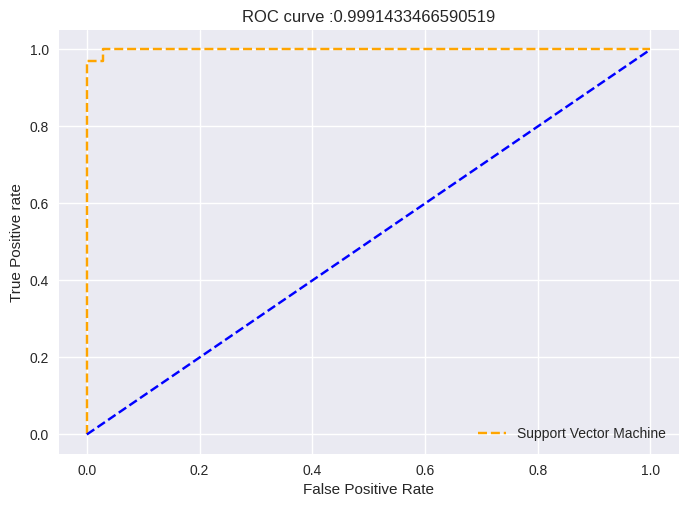

Model: Support Vector Machine has cross validation mean: 0.9829268292682926
Model: Support Vector Machine has cross validation standard deviation: 0.013579913080073237
Random Forest


<ipython-input-51-7b637d551466>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


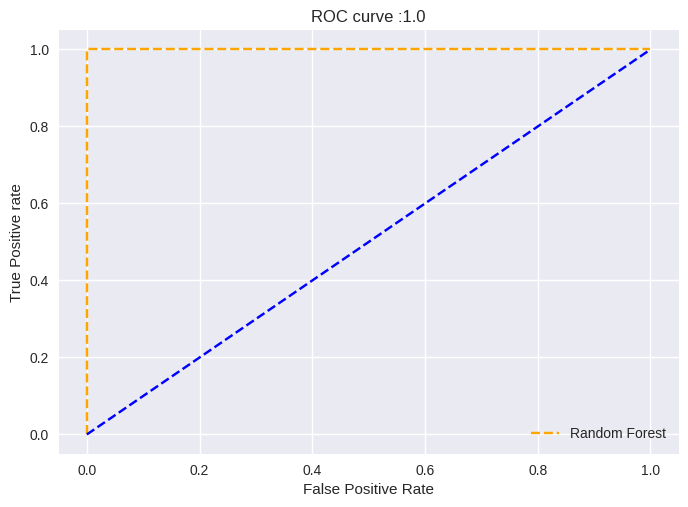

Model: Random Forest has cross validation mean: 0.9817073170731707
Model: Random Forest has cross validation standard deviation: 0.009832021644266532


In [ ]:
classifiers= ['K-Nearest Neighbour','Support Vector Machine','Random Forest']
models = [knn, best_clf, best_rfc_clf]
model_mean =[]
model_std = []
for clf_name, model in zip(classifiers,models):
  print(clf_name)
  pred_prob = model.predict_proba(x_test)
  generate_roc_curve(pred_prob, y_test, label = clf_name)
  cv_result = cross_val_score(model,x_train, y_train, cv=k_fold, scoring='accuracy')
  cv_mean = cv_result.mean()
  cv_std = cv_result.std()
  print(f'Model: {clf_name} has cross validation mean: {cv_mean}')
  print(f'Model: {clf_name} has cross validation standard deviation: {cv_std}')
  model_mean.append(cv_mean)
  model_std.append(cv_std)
